In [68]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression  # A simple linear regression model
from sklearn.metrics import mean_squared_error  # To evaluate the model performance


In [69]:
# Load the Breast Cancer dataset (binary classification: malignant vs benign)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign



In [70]:
# Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# This split is crucial! It helps evaluate how well the model generalizes to unseen data.
# Without a test set, we can't reliably measure the model's performance on new inputs.


In [71]:
# Initialize and train a linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# The model has now learned the relationship between features and the target using only training data


LinearRegression()

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
# Step 5: Evaluate on a SMALL SUBSET of training data
# We'll take just 10% of the training data as the "fake test"
X_train_sample = X_train.sample(frac=0.1, random_state=3)
y_train_sample = y_train.loc[X_train_sample.index]

# Predict and evaluate
y_pred_train_sample = model.predict(X_train_sample)
# convert predictions to binary classification (0 or 1)
y_pred_train_sample = np.where(y_pred_train_sample >= 0.6, 1, 0)
accuracy_train_sample = accuracy_score(y_train_sample, y_pred_train_sample)
print("Accuracy on Training Sample (10% of training set):", accuracy_train_sample)


Accuracy on Training Sample (10% of training set): 1.0


In [78]:
# Step 6: Evaluate on actual test set
y_pred_test = model.predict(X_test)
# convert predictions to binary classification (0 or 1)
y_pred_test = np.where(y_pred_test >= 0.6, 1, 0)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set (unseen data):", accuracy_test)

Accuracy on Test Set (unseen data): 0.9385964912280702


- You will likely see a **higher accuracy** on the training sample compared to the test set.
- This shows that the model performs better on data it has seen during training.
- But this is **not a realistic estimate** of performance on future, unseen data.


The size of the train-test split plays a critical role in both training the model effectively and evaluating it reliably.

#### ⚖️ Common Split Ratios
- **80% Train / 20% Test** → Most commonly used and balanced.
- **70% Train / 30% Test** → Provides a larger test set, useful for smaller datasets.
- **90% Train / 10% Test** → Maximizes training data but leaves little room for evaluation.

#### 🚨 Why You Shouldn't Use a Test Set That's Too Small
- A **very small test set (e.g., 5–10%)** may not capture the diversity or variability of the real-world data.
- It can lead to **high variance** in evaluation metrics — meaning your accuracy or loss might fluctuate a lot depending on which samples end up in the test set.
- You might **miss edge cases**, outliers, or rare examples that the model struggles with.

#### 🧪 Why You Shouldn't Use a Test Set That's Too Large
- A **very large test set (e.g., 40–50%)** reduces the amount of data the model has to learn from.
- This can cause **underfitting** — the model doesn't learn enough patterns and performs poorly.
- Especially problematic for small datasets, where every training sample matters.

#### ✅ Best Practices:
- Use **80/20** or **70/30** for most datasets.
- For **very small datasets**, consider **cross-validation** instead of a simple train-test split.
- Ensure both sets are representative of the overall distribution (use `stratify=y` in `train_test_split` for classification problems).

In [ ]:
# To make sure both training and test sets have similar class distributions (important for imbalanced datasets):
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


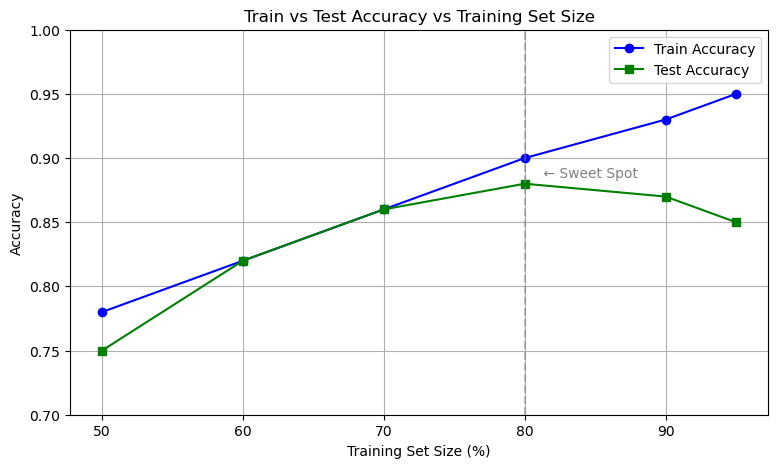

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Train sizes (%)
train_sizes = np.array([50, 60, 70, 80, 90, 95])

# Conceptual (mocked) values
train_accuracy =     [0.78, 0.82, 0.86, 0.90, 0.93, 0.95]
test_accuracy =      [0.75, 0.82, 0.86, 0.88, 0.87, 0.85]

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(train_sizes, train_accuracy, marker='o', label='Train Accuracy', color='blue')
plt.plot(train_sizes, test_accuracy, marker='s', label='Test Accuracy', color='green')

plt.title("Train vs Test Accuracy vs Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()

# Highlight sweet spot
plt.axvline(x=80, color='gray', linestyle='--', alpha=0.5)
plt.text(81, 0.885, ' ← Sweet Spot', color='gray')

plt.show()


- At 50–60%: Model underfits — train accuracy is low, test accuracy also low.
- At 70–90%: Balanced generalization — high and similar train and test accuracy.
- At 95%: Model continues to fit training data well, but test set is too small to give reliable estimates.

✅ This clearly illustrates why both **training set size** and **test set quality** matter for real-world model evaluation.
